In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [4]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
# check the missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset['current_year'] = 2020

In [13]:
final_dataset['num_of_years'] = final_dataset['current_year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,num_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [15]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [16]:
final_dataset.drop(['current_year'], axis=1, inplace=True)

In [17]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
num_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [20]:
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


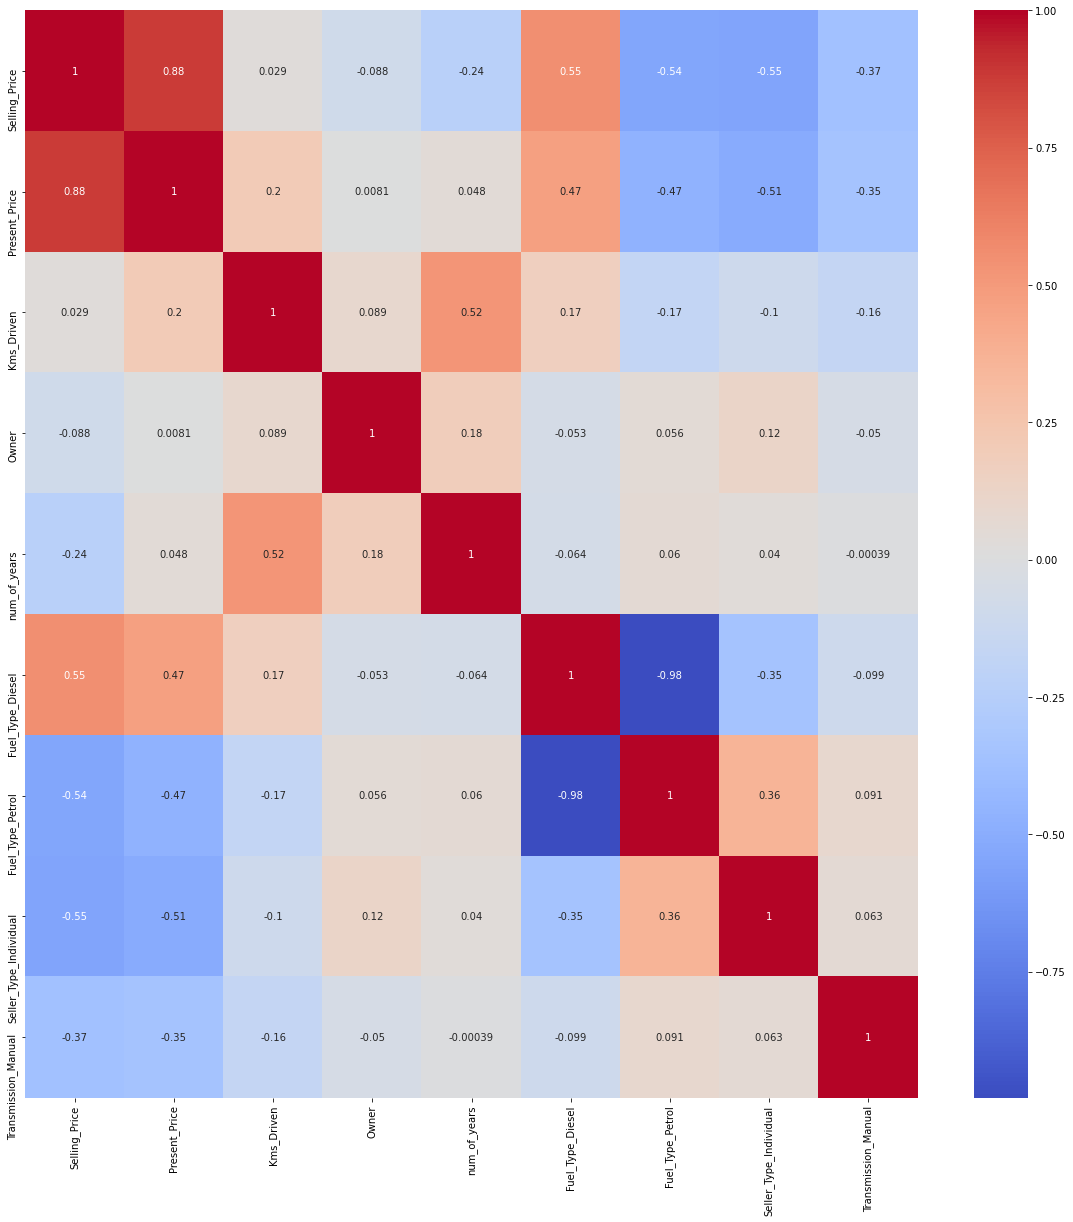

In [21]:
cormat = final_dataset.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True,cmap = 'coolwarm')
           


In [22]:
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,num_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.37500088 0.03873555 0.00040477 0.07637872 0.23798418 0.01088469
 0.12326815 0.13734305]


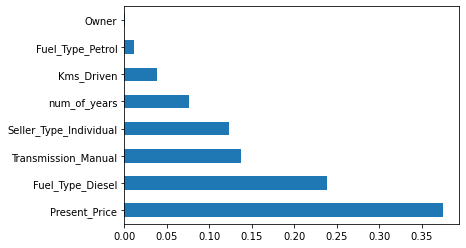

In [28]:
feat_importance = pd.Series(model.feature_importances_, index =X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [33]:
#hyper parameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num =12)]
max_features =['auto', 'sqrt']
max_depth = [ int(x) for x in np.linspace(5,30, 6)]
min_samples_split = [2,3,5,10,12, 30]
min_samples_leaf = [1, 4, 5, 8,10]

In [34]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid ,scoring='neg_mean_squared_error', n_iter =10, cv=5, verbose=3, n_jobs = -1, random_state=101 )
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 10, 12,
                                                              30],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=3)

In [40]:
predictions = rf_random.predict(X_test)
predictions

array([20.90771732,  8.13909522,  3.41644584,  0.49899537, 10.8436678 ,
        5.26282845,  3.91647898,  5.30422275,  1.1578205 ,  0.56659376,
        4.59935695,  6.47506667, 11.76287328,  5.31919322,  5.31138857,
        0.42783449,  1.36958236,  0.53352524,  4.50115309, 11.95630826,
        0.20400089,  1.16956174, 21.95032451,  2.46231944,  0.43158221,
        3.70655653,  3.0223237 ,  0.55368137,  7.52146139,  5.79815268,
        0.30424828,  5.42061276,  4.03226327, 10.05162533,  5.03276846,
        1.17463661,  0.43543416,  0.61295078,  1.12748862,  4.63484319,
        2.83649921,  4.67652058,  6.06644695,  1.04633135,  2.66880649,
        4.04772415, 10.50229891,  7.38561495,  3.67648425,  0.53153695,
        7.38478679,  9.97312848,  6.47090249,  5.07706418,  0.45512512,
        0.43830577,  0.23493633,  0.66259115,  0.61774686,  2.50217301,
        5.20374857])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

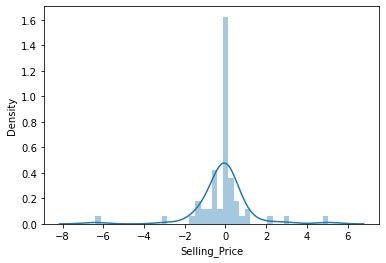

In [41]:
# check the output of the preictions and graph seems good as it follows normal distribution
sns.distplot(y_test-predictions)

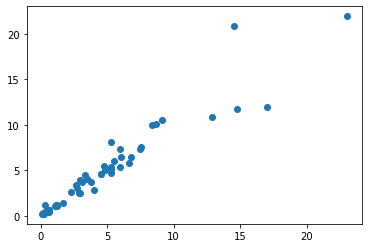

In [45]:
plt.scatter(y_test,predictions)
# model gave good model gives linear output

In [46]:
import pickle
file=open('random_forest_carprice_pred.pkl','wb')

pickle.dump(rf_random, file)